In [4]:
import numpy as np
import matplotlib.pyplot as plt

filenameCPU = "resCPUQuick.txt"
filenameGPU = "resGPUQuick.txt"
folder_to_save = "imgsQuick/"
NUMBER_OF_REPEATS = 3

    
class OneRun:
    def __init__(self, n):
        self.n = n
        self.times = []

    def addTime(self, time):
        self.times.append(time)

    def avg(self):
        self.avgTime = np.average(self.times)
        self.avgError = np.sqrt( np.sum([(x - self.avgTime)**2 for x in self.times]) / 3)

    def getTime(self):
        return (self.avgTime, self.avgError)

    def getN(self) -> int:
        return self.n

  

class experiment:
    def __init__(self):
        self.CPURuns = []
        self.GPURuns = []

    def addRun(self, runType: str, run: OneRun)-> None:
        if runType == 'CPU':
            self.CPURuns.append(run)
        elif runType == 'GPU':
            self.GPURuns.append(run)
        else:
            raise Exception("Not correct run type")

    def plotTimes(self, doSave=False) -> None:
        plt.errorbar([r.getN() for r in self.CPURuns],
                    [r.getTime()[0] for r in self.CPURuns],
                    yerr=[r.getTime()[1] for r in self.CPURuns],
                    fmt='o',
                    label="CPU")
        plt.errorbar([r.getN() for r in self.GPURuns],
                    [r.getTime()[0] for r in self.GPURuns],
                    yerr=[r.getTime()[1] for r in self.GPURuns],
                    fmt='o',
                    label="GPU")
        plt.title("Time of calculation ")
        plt.xlabel("Size of vector [counts]", fontsize=16)
        plt.ylabel("Time (s)", fontsize=16)
        plt.legend()
        plt.yscale('log')
        plt.xscale('log')
        if doSave:
            plt.savefig(folder_to_save + "Time_vs_N", dpi=300, bbox_inches='tight')
        plt.show()

    def plotAcceleration(self, doSave=False) -> None:
        plt.scatter([r.getN() for r in self.CPURuns],
                    np.array([r.getTime()[0] for r in self.CPURuns]) / (np.array([r.getTime()[0] for r in self.GPURuns])),
                    label="TimeGPU / TimeCPU")

        plt.title("Acceleration of CUDA")
        plt.xlabel("Size of vector [counts]", fontsize=16)
        plt.ylabel("Acceleration [Times]", fontsize=16)
        plt.legend()
        plt.yscale('log')
        plt.xscale('log')
        if doSave:
            plt.savefig(folder_to_save + "Acceleration_vs_N", dpi=300, bbox_inches='tight')
        plt.show()



main = experiment()

with open(filenameCPU, 'r') as inpf:
    l = inpf.readline()
    print(l)
    for l in inpf.readlines():
        s = l.strip().split()
        run = OneRun(int(s[0]))
        run.addTime(float(s[1]))
        run.addTime(float(s[2]))
        run.addTime(float(s[3]))
        run.avg()
        main.addRun('CPU', run)
        
with open(filenameGPU, 'r') as inpf:
    l = inpf.readline()
    print(l)
    for l in inpf.readlines():
        s = l.strip().split()
        run = OneRun(int(s[0]))
        run.addTime(float(s[1]))
        run.addTime(float(s[2]))
        run.addTime(float(s[3]))
        run.avg()
        main.addRun('GPU', run)
        

N      Time1     Time2      Time3

N      Time1     Time2      Time3



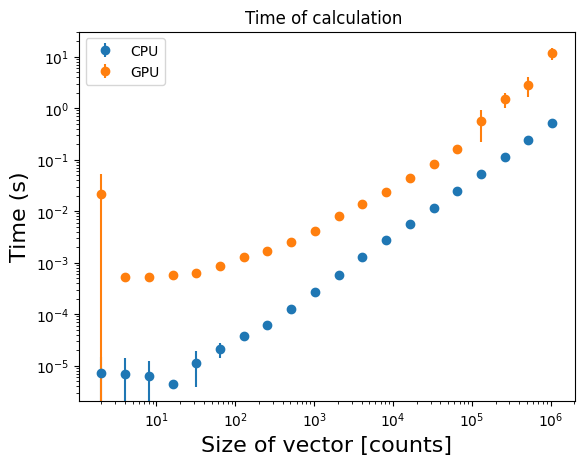

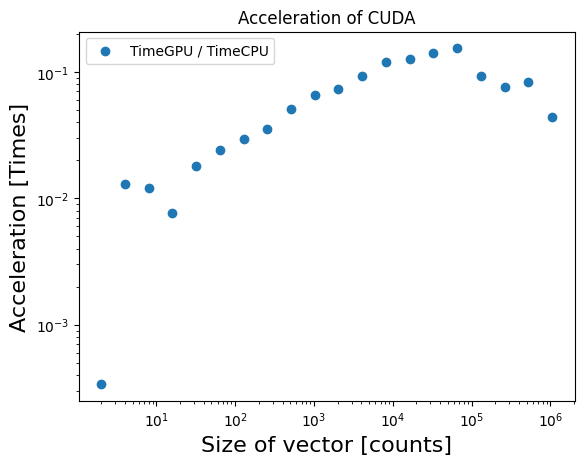

In [5]:
main.plotTimes(doSave=True)
main.plotAcceleration(doSave=True)